In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2022-10-07 09:43:27.021630: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14414376190052289834
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11760604288
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 2802144315906982266
physical_device_desc: "device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:02:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 11761897984
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 15867958878993155878
physical_device_desc: "device: 1, name: NVIDIA TITAN Xp, pci bus id: 0000:03:00.0, compute capability: 6.1"
, name: "/device:GPU:2"
device_type: "GPU"
memory_limit: 11761897984
locality {
  bus_id: 2
  numa_node: 1
  links {
    link {
      device_id: 3
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 16796958016268820967
p

2022-10-07 09:43:40.241301: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-07 09:43:40.242644: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-07 09:43:40.244023: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-07 09:43:41.023232: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2022-10-07 09:43:41.024612: I tensorflow/core/common_runtime/gpu/gpu_device.cc:17

In [1]:
import os
gpu_num = 1
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]=str(gpu_num)
print(os.environ["CUDA_VISIBLE_DEVICES"])

1


In [10]:
# !pip install --upgrade tensorflow==2.4.1

     |████████████████████████████████| 394.4 MB 20 kB/s s eta 0:00:01   |█████▊                          | 70.7 MB 9.5 MB/s eta 0:00:35                | 97.1 MB 70.1 MB/s eta 0:00:05
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
     |████████████████████████████████| 14.9 MB 58.2 MB/s eta 0:00:01
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached grpcio-1.32.0-cp38-cp38-manylinux2014_x86_64.whl (3.8 MB)
     |████████████████████████████████| 132 kB 64.0 MB/s eta 0:00:01
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3


In [2]:
import os
import numpy as np
import pandas as pd
from random import random, shuffle
import random as rn

from glob import glob
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model,load_model #model_from_json
from tensorflow.keras.layers import Masking, Flatten, Embedding, Dense, LSTM, TimeDistributed,Input, RepeatVector, Bidirectional, Dropout
from tensorflow.keras.layers import concatenate,Reshape,Permute,multiply
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import recall_score, precision_score, precision_recall_curve
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt

from time import time

from datetime import datetime,timedelta

# row 생략 없이 출력
pd.set_option('display.max_rows', 500)
# col 생략 없이 출력
pd.set_option('display.max_columns', 500)

seed_num = 4824
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

2023-01-09 18:18:44.282714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 18:18:46.188189: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64:/usr/local/cuda-11.1/lib:/usr/local/cuda-10.1/lib64:/usr/local/cuda-11.2/lib64
2023-01-09 18:18:46.188355: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib

In [3]:
datetime.today()
date = datetime.today().strftime("%m%d")

total_path = '/home/fortress544/DEV/MIMIC/datasets/Catholic'
path = '/home/fortress544/DEV/MIMIC/datasets/Catholic/PED-CDSS-01_Table/PED-CDSS-01_positive1/'
path_n = '/home/fortress544/DEV/MIMIC/datasets/Catholic/PED-CDSS-01_Table/PED-CDSS-01_negative1/'
#C:\Deepnoid\202110_중환자실 내 다장기 합병증 예측 시스템 개발 (서울성모병원 고태훈)\0619_lstm

glob = glob(path + '*')

hr = pd.read_csv(path + 'PED-CDSS-01_output_sepsis_positive1_hr.csv')
rr = pd.read_csv(path + 'PED-CDSS-01_output_sepsis_positive1_rr.csv')
mbp = pd.read_csv(path + 'PED-CDSS-01_output_sepsis_positive1_mbp.csv')
sao = pd.read_csv(path + 'PED-CDSS-01_output_sepsis_positive1_sao2.csv')
bt = pd.read_csv(path + 'PED-CDSS-01_output_sepsis_positive1_bt.csv')
sb = pd.read_csv(path + 'PED-CDSS-01_output_sepsis_positive1_subject_initialtime.csv')

hr_n = pd.read_csv(path_n + 'PED-CDSS-01_output_sepsis_negative1_hr.csv')
rr_n = pd.read_csv(path_n + 'PED-CDSS-01_output_sepsis_negative1_rr.csv')
sao_n = pd.read_csv(path_n + 'PED-CDSS-01_output_sepsis_negative1_sao2.csv')
mbp_n = pd.read_csv(path_n + 'PED-CDSS-01_output_sepsis_negative1_mbp.csv')
bt_n = pd.read_csv(path_n + 'PED-CDSS-01_output_sepsis_negative1_bt.csv')
sb_n = pd.read_csv(path_n + 'PED-CDSS-01_output_sepsis_negative1_subject_timepoint.csv')

In [4]:
len(pd.unique(sb['hadm_id']))

247

In [5]:
hr.rename(columns = {'hrtime':'charttime'},inplace=True)
rr.rename(columns = {'rrtime':'charttime'},inplace=True)
sao.rename(columns = {'sao2time':'charttime'},inplace=True)
mbp.rename(columns = {'mbptime':'charttime'},inplace=True)
bt.rename(columns = {'bttime':'charttime'},inplace=True)

hr_n.rename(columns = {'hrtime':'charttime'},inplace=True)
rr_n.rename(columns = {'rrtime':'charttime'},inplace=True)
sao_n.rename(columns = {'sao2time':'charttime'},inplace=True)
mbp_n.rename(columns = {'mbptime':'charttime'},inplace=True)
bt_n.rename(columns = {'bttime':'charttime'},inplace=True)

In [6]:
ids_p = pd.unique(sb['hadm_id'])
np.random.shuffle(ids_p)
print(len(ids_p))

ids_n = pd.unique(sb_n['hadm_id'])
np.random.shuffle(ids_n)
len(ids_n)

247


2122

In [7]:
## Hyper Parameters ##
lb=1
time_steps = 48
after_hour = 6
positive_range = 6
i=2
model_name='test_lstm_many_to_one_{0}h_pred_{1}_posrange'.format(str(after_hour),str(positive_range))
epochs = 100
batch_size=72-time_steps+positive_range - after_hour
pad_value=0
initial_learning_rate = 0.0005
# curve_shifting_value = 12
visualization=False

print('batch_size:{0}'.format(batch_size))

batch_size:24


In [8]:
print(len(pd.unique(hr[hr['hadm_id'].isin(ids_p)]['hadm_id'])))
print(len(pd.unique(hr_n[hr_n['hadm_id'].isin(ids_n)]['hadm_id'])))

218
2090


In [9]:
## Data loader ##
i=0
hadm_ids_p = []
x_p = []
y_p = []
for i in range(len(ids_p)):
    print(f'hadm_id:{ids_p[i]}',end='...',flush=True)
    if ids_p[i] in hr['hadm_id'].values:
        df_hr = hr[hr['hadm_id']==ids_p[i]]
        df_rr = rr[rr['hadm_id']==ids_p[i]]
        df_sa = sao[sao['hadm_id']==ids_p[i]]
        df_mp = mbp[mbp['hadm_id']==ids_p[i]]
        df_bt = bt[bt['hadm_id']==ids_p[i]]
        
        if df_hr['hrtimediff'].max() < positive_range:
            print('positive range..')
            continue
        
        df_vit = pd.merge(df_hr,df_rr[['RR','charttime']],how='outer',on='charttime')
        df_vit = pd.merge(df_vit,df_sa[['SaO2','charttime']],how='outer',on='charttime')
        df_vit = pd.merge(df_vit,df_mp[['MBP','charttime']],how='outer',on='charttime')
        df_vit = pd.merge(df_vit,df_bt[['BT','charttime']],how='outer',on='charttime')

        df_n = pd.DataFrame()
        df_vit['charttime'] = pd.to_datetime(df_vit['charttime'])
        df_vit.set_index(keys=['charttime'], inplace=True, drop=False)
        df_n['HR_1h'] = df_vit['HR'].resample('1H').mean().interpolate(method='linear')
        df_n['RR_1h'] = df_vit['RR'].resample('1H').mean().interpolate(method='linear').fillna(0)
        df_n['SaO2_1h'] = df_vit['SaO2'].resample('1H').mean().interpolate(method='linear').fillna(0)
        df_n['MBP_1h'] = df_vit['MBP'].resample('1H').mean().interpolate(method='linear').fillna(0)
        df_n['BT_1h'] = df_vit['BT'].resample('1H').mean().interpolate(method='linear').fillna(0)

        if df_n.isnull().sum().sum() != 0:
            print('NaN Columns exist')
            continue
        
        df_n['hadm_id'] = ids_p[i]
        df_n['charttime'] = df_n.index
        df_n['init_time'] = df_hr['Initial_Diagnosed_Time'].values[0]
        
        
        # Y만들기(최초 날짜와 동일하면 1, 아니면 0)
        ind = df_n.index
        init = pd.to_datetime(df_n['init_time'])
        sep = []
        for j in range(len(ind)):
            # if str(ind[i])[:-9] == str(init[i])[:-9]:
            if str(ind[j])[:-6] == str(init[j])[:-6]:
                sep.append(1)
            else:
                sep.append(0)
        sep = np.array(sep)
        sep_num = np.where(np.array(sep)==1)[0][0]
        
        ## positive range transformation
        # sep[np.where(sep==1)[0][0]-curve_shifting_value:np.where(sep==1)[0][0]] = 1
        sep[sep_num : sep_num + positive_range] = 1
                
        df_n['class'] = sep
        
        # if np.where(np.array(sep)==1)[0][0] < (int(time_steps/3)-1):
        if sep_num != 71:
            print('init_time too fast')
            continue
        # print(f'init_time:{np.where(np.array(sep)==1)[0][0]}')
        
        # # time_step 72시간 기준으로 부족하면 뒤에 0으로 채우고 넘치면 자르기
        # dfa = df_n.groupby('hadm_id').filter(lambda group: len(group) > lb).reset_index(drop=True)
        # dfa = dfa.groupby('hadm_id').apply(lambda group: group[0:time_steps]).reset_index(drop=True)
        # dfa = dfa.groupby('hadm_id').apply(lambda group: pd.concat([group, pd.DataFrame(pad_value*np.ones((time_steps-len(group), len(dfa.columns))), columns=dfa.columns)], axis=0)).reset_index(drop=True)

        vit_array = np.array(df_n[['HR_1h','RR_1h','SaO2_1h','MBP_1h','BT_1h','class']].fillna(0))
        
        # Set both dose and bis during LSTM_TIMEPOINTS before infusion to 0 
        # vit_array = np.vstack((np.zeros((time_steps, vit_array.shape[1])), vit_array))

        # Append the bis from the beginning to the end into the dataset
        for irow in range(1, vit_array.shape[0] - time_steps-after_hour+1):
            outputs = vit_array[irow + time_steps -1 + after_hour-1, -1] # -1 -->class col_number(3)
            # if bis == 0:
            #     continue
    
            # Append input values into dataset
            x_p.append(vit_array[irow:irow + time_steps, :-1])
            # x_rft_dose.append(vals[irow:irow + LSTM_TIMEPOINTS, RFT_DOSE])
            y_p.append(outputs)
            hadm_ids_p.append(ids_p[i])
            if irow == sep_num+1 - time_steps + positive_range - after_hour:
                # print('stop irow ',irow)
                break
        
        if visualization==True:
            j=0
            plt.figure('Imshow', facecolor='lightgray', figsize=(60,60))
            # plt.suptitle("NICU id:{0} vital sign\nHOSPITAL_EXPIRE_FLAG={1}".format(513,1),fontsize = 60)
            plt.subplot(5,1,1)
            plt.plot(df_n['charttime'], df_n['HR_1h'].values.astype('int'), marker='3', markersize=10,color='darkred')
            plt.axvline(x=pd.to_datetime(df_n['init_time'])[j], color='r', linestyle='--', linewidth=5)
            plt.ylim([130,190])
            plt.xticks(fontsize=32,rotation=0)
            plt.yticks(fontsize=28)
            # plt.axis('off')
            plt.title('Heart Rate',fontsize=48)

            plt.figure('Imshow', facecolor='lightgray', figsize=(60,60))
            # plt.suptitle("NICU id:{0} vital sign\nHOSPITAL_EXPIRE_FLAG={1}".format(513,1),fontsize = 60)
            plt.subplot(5,1,2)
            plt.plot(df_n['charttime'], df_n['RR_1h'].values.astype('int'), marker='3', markersize=10,color='darkviolet')
            plt.axvline(x=pd.to_datetime(df_n['init_time'])[j], color='r', linestyle='--', linewidth=5)
            plt.ylim([40,95])
            plt.xticks(fontsize=32,rotation=0)
            plt.yticks(fontsize=28)
            # plt.axis('off')
            plt.title('Resp Rate',fontsize=48)

            plt.figure('Imshow', facecolor='lightgray', figsize=(60,60))
            # plt.suptitle("NICU id:{0} vital sign\nHOSPITAL_EXPIRE_FLAG={1}".format(513,1),fontsize = 60)
            plt.subplot(5,1,3)
            plt.plot(df_n['charttime'], df_n['SaO2_1h'].values.astype('int'), marker='3', markersize=10,color='blue')
            plt.axvline(x=pd.to_datetime(df_n['init_time'])[j], color='r', linestyle='--', linewidth=5)
            plt.ylim([80,101])
            plt.xticks(fontsize=32,rotation=0)
            plt.yticks(fontsize=28)
            # plt.axis('off')
            plt.title('SaO2',fontsize=48)

            plt.figure('Imshow', facecolor='lightgray', figsize=(60,60))
            # plt.suptitle("NICU id:{0} vital sign\nHOSPITAL_EXPIRE_FLAG={1}".format(513,1),fontsize = 60)
            plt.subplot(5,1,4)
            plt.plot(df_n['charttime'], df_n['MBP_1h'].values.astype('int'), marker='3', markersize=10,color='seagreen')
            plt.axvline(x=pd.to_datetime(df_n['init_time'])[j], color='r', linestyle='--', linewidth=5)
            plt.ylim([50,100])
            plt.xticks(fontsize=32,rotation=0)
            plt.yticks(fontsize=28)
            # plt.axis('off')
            plt.title('Mean Blood Pressure',fontsize=48)

            plt.figure('Imshow', facecolor='lightgray', figsize=(60,60))
            # plt.suptitle("NICU id:{0} vital sign\nHOSPITAL_EXPIRE_FLAG={1}".format(513,1),fontsize = 60)
            plt.subplot(5,1,5)
            plt.plot(df_n['charttime'], df_n['BT_1h'].values.astype('int'), marker='3', markersize=10,color='dimgray')
            plt.axvline(x=pd.to_datetime(df_n['init_time'])[j], color='r', linestyle='--', linewidth=5)
            plt.ylim([34,39])
            plt.xticks(fontsize=32,rotation=0)
            plt.yticks(fontsize=28)
            # plt.axis('off')
            plt.title('Body Temperature',fontsize=48)
            plt.show()

        print('done')
    else:
        print('not in the heart rate hadm_id')


hadm_id:129102...init_time too fast
hadm_id:130594...NaN Columns exist
hadm_id:109109...not in the heart rate hadm_id
hadm_id:162083...done
hadm_id:101189...init_time too fast
hadm_id:146109...done
hadm_id:121365...done
hadm_id:133017...done
hadm_id:198274...done
hadm_id:199657...done
hadm_id:132866...done
hadm_id:195845...done
hadm_id:194784...done
hadm_id:111842...init_time too fast
hadm_id:145578...done
hadm_id:176501...done
hadm_id:109189...done
hadm_id:107774...done
hadm_id:148327...positive range..
hadm_id:146409...not in the heart rate hadm_id
hadm_id:138755...not in the heart rate hadm_id
hadm_id:127342...done
hadm_id:173311...init_time too fast
hadm_id:154330...done
hadm_id:180383...done
hadm_id:127535...not in the heart rate hadm_id
hadm_id:149290...not in the heart rate hadm_id
hadm_id:117403...done
hadm_id:173316...done
hadm_id:186951...done
hadm_id:143494...positive range..
hadm_id:173446...done
hadm_id:100498...done
hadm_id:180751...done
hadm_id:131426...done
hadm_id:1618

In [10]:
x_p = np.array(x_p)
y_p = np.array(y_p)
hadm_ids_p = np.array(hadm_ids_p)

caseid_p = np.unique(hadm_ids_p)

print(len(caseid_p))
print(len(hadm_ids_p))

print(len(pd.unique(hr_n['hadm_id'])))
print(len(pd.unique(rr_n['hadm_id'])))
print(len(pd.unique(mbp_n['hadm_id'])))
print(len(pd.unique(sao_n['hadm_id'])))
print(len(pd.unique(bt_n['hadm_id'])))

173
4152
2090
2087
2094
2078
2090


In [11]:
ids_n = pd.unique(sb_n['hadm_id'])
np.random.shuffle(ids_n)
len(ids_n)

caseid_n = np.random.choice(ids_n,len(caseid_p)*2,replace=False)
len(caseid_n)
drop_count = 0
i=268
x_n = []
y_n = []
hadm_ids_n = []
for i in range(len(caseid_n)):
    print(f'hadm_id:{caseid_n[i]}',end='...',flush=True)
    if caseid_n[i] in hr_n['hadm_id'].values:
        hr_n1 = hr_n[hr_n['hadm_id']==caseid_n[i]]
        rr_n1 = rr_n[rr_n['hadm_id']==caseid_n[i]]
        sao_n1 = sao_n[sao_n['hadm_id']==caseid_n[i]]
        mbp_n1 = mbp_n[mbp_n['hadm_id']==caseid_n[i]]
        bt_n1 = bt_n[bt_n['hadm_id']==caseid_n[i]]
        
        tp = pd.unique(hr_n1['timepoint'])
        tp_choice = np.random.choice(tp[:-1])
        
        df_hr_n = hr_n1[hr_n1['timepoint']==tp_choice]
        df_rr_n = rr_n1[rr_n1['timepoint']==tp_choice]
        df_sao_n = sao_n1[sao_n1['timepoint']==tp_choice]
        df_mbp_n = mbp_n1[mbp_n1['timepoint']==tp_choice]
        df_bt_n = bt_n1[bt_n1['timepoint']==tp_choice]
        
        df_vit_n = pd.merge(df_hr_n,df_rr_n[['RR','charttime']],how='outer',on='charttime')
        df_vit_n = pd.merge(df_vit_n,df_sao_n[['SaO2','charttime']],how='outer',on='charttime')
        df_vit_n = pd.merge(df_vit_n,df_mbp_n[['MBP','charttime']],how='outer',on='charttime')
        df_vit_n = pd.merge(df_vit_n,df_bt_n[['BT','charttime']],how='outer',on='charttime')
    
        df_n_n = pd.DataFrame()
        df_vit_n['charttime'] = pd.to_datetime(df_vit_n['charttime'])
        df_vit_n.set_index(keys=['charttime'], inplace=True, drop=False)
        df_n_n['HR_1h'] = df_vit_n['HR'].resample('1H').mean().interpolate(method='linear')
        df_n_n['RR_1h'] = df_vit_n['RR'].resample('1H').mean().interpolate(method='linear').fillna(0)
        df_n_n['SaO2_1h'] = df_vit_n['SaO2'].resample('1H').mean().interpolate(method='linear').fillna(0)
        df_n_n['MBP_1h'] = df_vit_n['MBP'].resample('1H').mean().interpolate(method='linear').fillna(0)
        df_n_n['BT_1h'] = df_vit_n['BT'].resample('1H').mean().interpolate(method='linear').fillna(0)
    
        if df_n_n.isnull().sum().sum() != 0:
            print('NaN Columns exist')
            drop_count += 1
            continue
        if len(df_n_n) < time_steps + after_hour + batch_size:
            print('Data too short')
            drop_count += 1
            continue
        
        df_n_n['hadm_id'] = caseid_n[i]
        df_n_n['charttime'] = df_n_n.index
        df_n_n['init_time'] = tp_choice
    
        # Y만들기(최초 날짜와 동일하면 1, 아니면 0)
        df_n_n['class'] = 0
    
        vit_array = np.array(df_n_n[['HR_1h','RR_1h','SaO2_1h','MBP_1h','BT_1h','class']].fillna(0))
    
        # Append the bis from the beginning to the end into the dataset
        for irow in range(1, vit_array.shape[0] - time_steps-after_hour+1):
            outputs = vit_array[irow + time_steps -1 + after_hour-1, -1] # -1 -->class col_number(3)
            # if bis == 0:
            #     continue
    
            # Append input values into dataset
            x_n.append(vit_array[irow:irow + time_steps, :-1])
            # x_rft_dose.append(vals[irow:irow + LSTM_TIMEPOINTS, RFT_DOSE])
            y_n.append(outputs)
            hadm_ids_n.append(caseid_n[i])
            if irow == sep_num+1 - time_steps + positive_range - after_hour:
                    # print('stop irow ',irow)
                    break
        print('done')
    else:
        print('not in the heart rate hadm_id')
        drop_count += 1


x_n = np.array(x_n)
y_n = np.array(y_n)
hadm_ids_n = np.array(hadm_ids_n)
caseid_n = np.unique(hadm_ids_n)

print(len(caseid_n))
print(len(hadm_ids_n))


hadm_id:104207...done
hadm_id:144379...done
hadm_id:111948...done
hadm_id:147200...done
hadm_id:158424...done
hadm_id:133844...done
hadm_id:145542...done
hadm_id:106649...done
hadm_id:108263...done
hadm_id:192775...done
hadm_id:138031...done
hadm_id:182982...done
hadm_id:151851...done
hadm_id:178498...done
hadm_id:137582...done
hadm_id:152163...done
hadm_id:134645...done
hadm_id:192942...done
hadm_id:166604...done
hadm_id:104945...done
hadm_id:172020...done
hadm_id:127555...done
hadm_id:118982...done
hadm_id:178741...done
hadm_id:158582...NaN Columns exist
hadm_id:180231...done
hadm_id:162298...done
hadm_id:118650...done
hadm_id:186296...done
hadm_id:197642...done
hadm_id:132490...done
hadm_id:108066...done
hadm_id:174310...done
hadm_id:128499...done
hadm_id:162102...done
hadm_id:193645...done
hadm_id:140681...done
hadm_id:112009...done
hadm_id:189324...done
hadm_id:125609...done
hadm_id:151420...done
hadm_id:102158...done
hadm_id:128538...done
hadm_id:141115...done
hadm_id:111186...do

In [60]:
pd.DataFrame(hadm_ids_n).iloc[:,0].value_counts()

136815    24
152122    24
160262    24
102700    24
115414    24
173952    24
132158    24
151046    24
137605    24
176823    24
162207    24
125735    24
160481    24
116264    24
141022    24
139310    24
147315    24
140900    24
165624    24
176337    24
180133    24
138280    24
178110    24
160242    24
194895    24
143707    24
150769    24
167031    24
113227    24
131052    24
185259    24
189250    24
119945    24
104044    24
110724    24
111499    24
172130    24
117641    24
121935    24
134641    24
178366    24
161015    24
142428    24
131053    24
126546    24
148237    24
192445    24
118422    24
181324    24
195307    24
170688    24
101483    24
184123    24
155160    24
184663    24
196494    24
166310    24
184469    24
133823    24
199802    24
126197    24
122620    24
109066    24
144840    24
151851    24
193174    24
160182    24
160290    24
155972    24
152050    24
110306    24
137280    24
151713    24
129714    24
191779    24
136675    24
131263    24

In [12]:
## positive + negative
x = np.append(x_p,x_n,axis=0)
y = np.append(y_p,y_n,axis=0)

###############################################################################
## normalization ##

def x_normalization(x):
    hr_x = []
    rr_x = []
    sa_x = []
    bp_x = []
    bt_x = []

    for i in range(len(x)):
        hr_x.append(x[i,:,0])
        rr_x.append(x[i,:,1])
        sa_x.append(x[i,:,2])
        bp_x.append(x[i,:,3])
        bt_x.append(x[i,:,4])   

    hr_min,hr_max = np.array(hr_x).flatten().min(), np.array(hr_x).flatten().max()
    rr_min,rr_max = np.array(rr_x).flatten().min(), np.array(rr_x).flatten().max()
    sa_min,sa_max = np.array(sa_x).flatten().min(), np.array(sa_x).flatten().max()
    bp_min,bp_max = np.array(bp_x).flatten().min(), np.array(bp_x).flatten().max()
    bt_min,bt_max = np.array(bt_x).flatten().min(), np.array(bt_x).flatten().max()
    
    hr_x_n = (hr_x - hr_min) / (hr_max - hr_min)
    rr_x_n = (rr_x - rr_min) / (rr_max - rr_min)
    sa_x_n = (sa_x - sa_min) / (sa_max - sa_min)
    bp_x_n = (bp_x - bp_min) / (bp_max - bp_min)
    bt_x_n = (bt_x - bt_min) / (bt_max - bt_min)
    
    x_data = []
    for i in range(len(hr_x_n)):
        x_data.append(np.stack((hr_x_n[i],rr_x_n[i],sa_x_n[i],bp_x_n[i],bt_x_n[i]),axis=1))
 
    return np.array(x_data)


###############################################################################
###############################################################################
### data_split ###
### data split_positive ###
caseid = np.concatenate((caseid_p, caseid_n),axis=0)
n = len(caseid_p)
ntrain = int(n*0.8)
nvalid = int(n*0.1)


x_p = x_normalization(x_p)
train_caseid_p = caseid_p[:ntrain]
test_caseid_p = caseid_p[ntrain:]
valid_caseid_p = test_caseid_p[:int(len(test_caseid_p)*0.5)]
test_caseid_p = test_caseid_p[int(len(test_caseid_p)*0.5):]

train_mask_p = np.isin(hadm_ids_p, train_caseid_p)
valid_mask_p = np.isin(hadm_ids_p, valid_caseid_p)
test_mask_p = np.isin(hadm_ids_p, test_caseid_p)

X_train_p = x_p[train_mask_p]
X_valid_p = x_p[valid_mask_p]
X_test_p = x_p[test_mask_p]

Y_train_p = y_p[train_mask_p]
Y_valid_p = y_p[valid_mask_p]
Y_test_p = y_p[test_mask_p]

id_train_p = hadm_ids_p[train_mask_p]
id_valid_p = hadm_ids_p[valid_mask_p]
id_test_p = hadm_ids_p[test_mask_p]

###############################################################################
###############################################################################
### data split_negative ###
n_n = len(caseid_n)
ntrain_n = int(n_n*0.8)
nvalid_n = int(n_n*0.1)


x_n = x_normalization(x_n)
train_caseid_n = caseid_n[:ntrain_n]
test_caseid_n = caseid_n[ntrain_n:]
valid_caseid_n = test_caseid_n[:int(len(test_caseid_n)*0.5)]
test_caseid_n = test_caseid_n[int(len(test_caseid_n)*0.5):]

train_mask_n = np.isin(hadm_ids_n, train_caseid_n)
valid_mask_n = np.isin(hadm_ids_n, valid_caseid_n)
test_mask_n = np.isin(hadm_ids_n, test_caseid_n)

print(hadm_ids_n.shape)

X_train_n = x_n[train_mask_n]
X_valid_n = x_n[valid_mask_n]
X_test_n = x_n[test_mask_n]

Y_train_n = y_n[train_mask_n]
Y_valid_n = y_n[valid_mask_n]
Y_test_n = y_n[test_mask_n]

id_train_n = hadm_ids_n[train_mask_n]
id_valid_n = hadm_ids_n[valid_mask_n]
id_test_n = hadm_ids_n[test_mask_n]

X_train = np.append(X_train_p,X_train_n,axis=0)
X_valid = np.append(X_valid_p,X_valid_n,axis=0)
X_test = np.append(X_test_p,X_test_n,axis=0)
Y_train = np.append(Y_train_p,Y_train_n,axis=0)
Y_valid = np.append(Y_valid_p,Y_valid_n,axis=0)
Y_test = np.append(Y_test_p,Y_test_n,axis=0)


(7800,)


In [13]:
Y_test_id = np.append(id_test_p,id_test_n,axis=0)
print(len(Y_test_id))

1224


In [30]:
print(len(np.unique(id_test_p)))
np.unique(id_test_p)

18


array([190267, 190478, 192431, 192818, 192854, 192996, 194784, 194883,
       195797, 195845, 196168, 196728, 198176, 198274, 198285, 198633,
       198741, 199657])

In [29]:
print(len(np.unique(id_test_n)))
np.unique(id_test_n)

33


array([189018, 189153, 189324, 189833, 190361, 191816, 192093, 192621,
       192775, 192788, 192791, 192942, 193246, 193600, 193645, 193703,
       193896, 194895, 195613, 195698, 196178, 196449, 197035, 197186,
       197455, 197642, 197732, 197767, 198310, 198745, 198940, 199243,
       199403])

In [14]:
for i in range(batch_size-4,batch_size+8):
    print('## {0} ##'.format(i))
    print(X_train[i,:4,:])
    print('####')


## 20 ##
[[0.60406091 0.38461538 0.87       0.65464286 0.92549575]
 [0.52791878 0.7008547  0.89       0.655      0.92549575]
 [0.5177665  0.56410256 0.95       0.65535714 0.95750708]
 [0.50253807 0.56410256 0.94       0.65571429 0.92039658]]
####
## 21 ##
[[0.52791878 0.7008547  0.89       0.655      0.92549575]
 [0.5177665  0.56410256 0.95       0.65535714 0.95750708]
 [0.50253807 0.56410256 0.94       0.65571429 0.92039658]
 [0.52791878 0.55555556 0.96       0.65607143 0.91784705]]
####
## 22 ##
[[0.5177665  0.56410256 0.95       0.65535714 0.95750708]
 [0.50253807 0.56410256 0.94       0.65571429 0.92039658]
 [0.52791878 0.55555556 0.96       0.65607143 0.91784705]
 [0.49746193 0.56410256 0.92       0.65642857 0.92549575]]
####
## 23 ##
[[0.50253807 0.56410256 0.94       0.65571429 0.92039658]
 [0.52791878 0.55555556 0.96       0.65607143 0.91784705]
 [0.49746193 0.56410256 0.92       0.65642857 0.92549575]
 [0.55837563 0.58119658 0.92       0.65678571 0.95184134]]
####
## 24 ##
[[0

In [15]:
for i in range(batch_size-8,batch_size+2):
    print('## {0} ##'.format(i))
    print(Y_train[i])
    print('####')

## 16 ##
0.0
####
## 17 ##
0.0
####
## 18 ##
1.0
####
## 19 ##
1.0
####
## 20 ##
1.0
####
## 21 ##
1.0
####
## 22 ##
1.0
####
## 23 ##
1.0
####
## 24 ##
0.0
####
## 25 ##
0.0
####


In [19]:
a = np.where(Y_train==1)[0]
for i in range(len(a)):
    print(a[i*after_hour:i*after_hour+after_hour])


[18 19 20 21 22 23]
[42 43 44 45 46 47]
[66 67 68 69 70 71]
[90 91 92 93 94 95]
[114 115 116 117 118 119]
[138 139 140 141 142 143]
[162 163 164 165 166 167]
[186 187 188 189 190 191]
[210 211 212 213 214 215]
[234 235 236 237 238 239]
[258 259 260 261 262 263]
[282 283 284 285 286 287]
[306 307 308 309 310 311]
[330 331 332 333 334 335]
[354 355 356 357 358 359]
[378 379 380 381 382 383]
[402 403 404 405 406 407]
[426 427 428 429 430 431]
[450 451 452 453 454 455]
[474 475 476 477 478 479]
[498 499 500 501 502 503]
[522 523 524 525 526 527]
[546 547 548 549 550 551]
[570 571 572 573 574 575]
[594 595 596 597 598 599]
[618 619 620 621 622 623]
[642 643 644 645 646 647]
[666 667 668 669 670 671]
[690 691 692 693 694 695]
[714 715 716 717 718 719]
[738 739 740 741 742 743]
[762 763 764 765 766 767]
[786 787 788 789 790 791]
[810 811 812 813 814 815]
[834 835 836 837 838 839]
[858 859 860 861 862 863]
[882 883 884 885 886 887]
[906 907 908 909 910 911]
[930 931 932 933 934 935]
[954 955 9

In [20]:
for i in range(len(Y_train)):
    print(i,Y_train[i])

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 1.0
115 1.0
116 1.0
117 1.0
118 1.0
119 1.0
120 0.0
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.0
135 0.0
136 0.0
137 0.0
138 1.

In [14]:
def attention_3d_block_time_features(inputs, TIME_STEPS):
    """
    inputs.shape = (batch_size, time_steps, input_dim)
    """ 
    input_dim = int(inputs.shape[2])
    a = Flatten()(inputs)
    a = Dense(TIME_STEPS*input_dim, activation='softmax')(a)
    a = Reshape((input_dim, TIME_STEPS))(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = multiply([inputs, a_probs])
    return output_attention_mul

In [22]:
(batch_size, time_steps, X_train.shape[2])

(24, 48, 5)

In [23]:
X_train.shape

(9552, 48, 5)

In [15]:
l1 = [16,32,64]
l2 = [16,32,64]
lr = [1e-3,5e-4,1e-4]
weight = [1,2]
attention = ['True','False']
layer_num = [0,1,2]

# def attention_3d_block(inputs, TIME_STEPS):
#     """
#     inputs.shape = (batch_size, time_steps, input_dim)
#     """ 
#     input_dim = int(inputs.shape[2])
#     a = Permute((2, 1))(inputs)
#     a = Reshape((input_dim, TIME_STEPS))(a)
#     a = Dense(TIME_STEPS, activation='softmax')(a)
#     a_probs = Permute((2, 1), name='attention_vec')(a)
#     #output_attention_mul = merge([inputs, a_probs], name='attention_mul', mode='mul')
#     output_attention_mul = multiply([inputs, a_probs])
#     return output_attention_mul

def attention_3d_block_time_features(inputs, TIME_STEPS):
    """
    inputs.shape = (batch_size, time_steps, input_dim)
    """ 
    input_dim = int(inputs.shape[2])
    a = Flatten()(inputs)
    a = Dense(TIME_STEPS*input_dim, activation='softmax')(a)
    a = Reshape((input_dim, TIME_STEPS))(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = multiply([inputs, a_probs])
    return output_attention_mul

def build_model(l1, l2, layer_num, no_feature_cols=None, time_steps=48, output_summary=False, attention='False'):

    """
    Args:
    ----
    no_feature_cols : The number of features being used AKA matrix rank
    time_steps : The number of days in a time block
    output_summary : Defaults to False on returning model summary
    Returns:
    ------- 
    Keras model object
    """
    print("time_steps:{0} | no_feature_cols:{1}".format(time_steps,no_feature_cols)) 
    input_layer = Input(shape=(time_steps, no_feature_cols))
    if attention=='True':
        x = attention_3d_block_time_features(input_layer, time_steps)
        x = Masking(mask_value=0, input_shape=(time_steps, no_feature_cols))(x)
    else:        
        x = Masking(mask_value=0, input_shape=(time_steps, no_feature_cols))(input_layer) 
    
    if layer_num==0:
            pass
    else:        
        for layers in range(1,layer_num+1):
            x = Bidirectional(LSTM(l1, return_sequences=True))(x)
    x = Bidirectional(LSTM(l2, return_sequences=False))(x)
    x = Dense(l2, activation='relu')(x)
    preds = Dense(1, activation="sigmoid")(x)
    #   preds = TimeDistributed(Dense(1, activation="sigmoid"))(x)
    model = Model(inputs=input_layer, outputs=preds,name="{0}-{1}-{2}-{3}-{4}-{5}_gpu{6}".format(str(i),str(j),str(k),str(z),str(q),str(w),gpu_num))

    RMS = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=5e-05)
    focal = tfa.losses.SigmoidFocalCrossEntropy(
        from_logits= False,
        alpha = 0.25,
        gamma = 2.0,
        reduction= tf.keras.losses.Reduction.NONE,
        name = 'sigmoid_focal_crossentropy'
    )
    model.compile(optimizer=RMS, loss=focal, metrics=['acc','binary_crossentropy',focal])

    if output_summary:
        model.summary()
    return model

In [16]:
l1 = [16,32,64]
l2 = [16,32,64]
lr = [1e-3,5e-4,1e-4]
weight = [1,2]
layer_num = [0,1,2]
attention = ['True','False']

i, j, k, z, w, q = 0,0,2,0,2,0 
# l1[i],l2[j],lr[k],weight[z],layer_num[w],attention[q]

In [17]:
#build model
# model = build_model(no_feature_cols=X_train.shape[2], output_summary=True, 
#                   time_steps=time_steps)

model = build_model(l1=l1[i], l2=l2[j], layer_num=layer_num[w], no_feature_cols=X_train.shape[2], output_summary=True, 
                  time_steps=time_steps,attention=attention[q])

time_steps:48 | no_feature_cols:5


2023-01-09 18:20:08.179914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 18:20:09.210701: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11411 MB memory:  -> device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:03:00.0, compute capability: 6.1


Model: "0-0-2-0-0-2_gpu1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 5)]      0           []                               
                                                                                                  
 flatten (Flatten)              (None, 240)          0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 240)          57840       ['flatten[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 5, 48)        0           ['dense[0][0]']                  
                                                                                   

In [18]:
# model_path = total_path + '/weight/22{0}_lstm_2/'.format(date)
# os.makedirs(model_path,exist_ok=True)

# model_weight = model_path + date + model_name + ".h5"
# model_checkpoint = ModelCheckpoint(model_weight, monitor='val_loss', save_best_only=True)
# print(model_weight)
# def lr_step_decay(epoch, lr):
#     drop_rate = 0.95
#     epochs_drop = 10.0
#     return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))


# initial_learning_rate = lr[z]
# epochs = 150

# hist = model.fit(x=X_train, y=Y_train, 
#                  validation_data=(X_valid, Y_valid),
#                  epochs=epochs,
#                  batch_size=batch_size,
#                  callbacks=[model_checkpoint,
#                             EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto'),
#                             LearningRateScheduler(lr_step_decay, verbose=1),
#                             ],
# #                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto'),
#                  class_weight={0:1, 1:weight[z]}
# #                             ],
#                  )    

/home/fortress544/DEV/MIMIC/datasets/Catholic/weight/221116_lstm_2/1116test_lstm_many_to_one_6h_pred_6_posrange.h5

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/150


2022-11-16 09:39:56.089383: W tensorflow/core/common_runtime/forward_type_inference.cc:332] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_20/output/_23'
2022-11-16 09:39:56.840945: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


398/398 [==============================] - 53s 67ms/step - loss: 0.0289 - acc: 0.9133 - binary_crossentropy: 0.3534 - sigmoid_focal_crossentropy: 0.0289 - val_loss: 0.0250 - val_acc: 0.9133 - val_binary_crossentropy: 0.3497 - val_sigmoid_focal_crossentropy: 0.0250 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/150
398/398 [==============================] - 18s 44ms/step - loss: 0.0224 - acc: 0.9133 - binary_crossentropy: 0.2833 - sigmoid_focal_crossentropy: 0.0224 - val_loss: 0.0217 - val_acc: 0.9133 - val_binary_crossentropy: 0.2940 - val_sigmoid_focal_crossentropy: 0.0217 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/150
398/398 [==============================] - 18s 45ms/step - loss: 0.0216 - acc: 0.9133 - binary_crossentropy: 0.2676 - sigmoid_focal_crossentropy: 0.0216 - val_loss: 0.0213 - val_acc: 0.9133 - val_binary_crossentropy: 0.2842 - val_sigmoid_focal_crossentropy: 0.0213 - lr: 0.0010

Epoch 4: Lear

Epoch 24/150
398/398 [==============================] - 15s 37ms/step - loss: 0.0195 - acc: 0.9143 - binary_crossentropy: 0.2322 - sigmoid_focal_crossentropy: 0.0195 - val_loss: 0.0200 - val_acc: 0.9133 - val_binary_crossentropy: 0.2539 - val_sigmoid_focal_crossentropy: 0.0200 - lr: 9.0250e-04

Epoch 25: LearningRateScheduler setting learning rate to 0.0009025.
Epoch 25/150
398/398 [==============================] - 15s 36ms/step - loss: 0.0197 - acc: 0.9143 - binary_crossentropy: 0.2352 - sigmoid_focal_crossentropy: 0.0197 - val_loss: 0.0198 - val_acc: 0.9133 - val_binary_crossentropy: 0.2407 - val_sigmoid_focal_crossentropy: 0.0198 - lr: 9.0250e-04

Epoch 26: LearningRateScheduler setting learning rate to 0.0009025.
Epoch 26/150
398/398 [==============================] - 15s 37ms/step - loss: 0.0195 - acc: 0.9142 - binary_crossentropy: 0.2316 - sigmoid_focal_crossentropy: 0.0195 - val_loss: 0.0210 - val_acc: 0.9133 - val_binary_crossentropy: 0.2748 - val_sigmoid_focal_crossentropy: 0

In [31]:
Y_test.shape

(1224,)

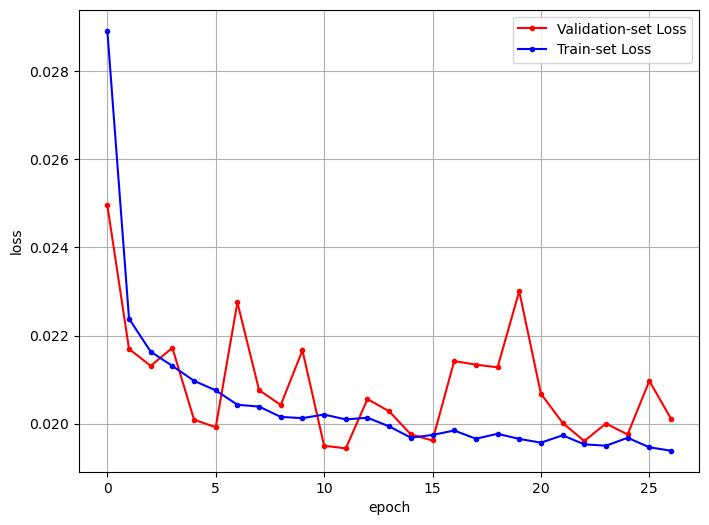

In [19]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
